<a href="https://colab.research.google.com/github/hughjafro/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/CTolbert_DS212_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U matplotlib

    100% |████████████████████████████████| 12.9MB 2.7MB/s 
    100% |████████████████████████████████| 952kB 21.8MB/s 
yellowbrick 0.9 has requirement matplotlib<3.0,>=1.5.1, but you'll have matplotlib 3.0.2 which is incompatible.
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [4]:
cust = [127, 80, 105, 92, 120, 115, 93]

cov = np.cov(sales,cust)
print(cov)

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [5]:
stdev_sales = np.std(sales)
stdev_cust = np.std(cust)

print("The standard deviation of last week's customers:\n", stdev_sales)

calc = np.array([[stdev_sales ** 2, stdev_sales * stdev_cust],
                [stdev_sales * stdev_cust, stdev_cust ** 2]])

corcoef = np.divide(cov, calc)

print("\nThe correlation coefficient:\n", corcoef)

print("\nHopefully my calculations look like this:\n", np.corrcoef(sales, cust))

The standard deviation of last week's customers:
 428.67360686714756

The correlation coefficient:
 [[1.16666667 1.12330631]
 [1.12330631 1.16666667]]

Hopefully my calculations look like this:
 [[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
# Import dataset as a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0)

In [7]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [8]:
df.shape

(1310, 15)

In [9]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [10]:
df.var()

pclass                 0.701969
survived               0.236250
age                  165.850021
sibsp                  1.085052
parch                  0.749195
fare                2678.959738
body                9544.688567
has_cabin_number       0.174613
dtype: float64

In [11]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [12]:
# Define 2 ortho vectors
X = [1,1]
Y = [1,-1]

#Orthogonal = perpendicular
print(np.dot(X,Y))

0


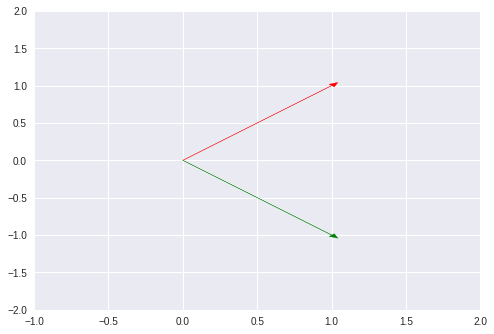

In [13]:

# Plot v1, v2
plt.arrow(0,0, X[0], X[1], head_width=0.05, head_length=0.06, color='r')
plt.arrow(0,0, Y[0], Y[1], head_width=0.05, head_length=0.06, color='g')
plt.xlim(-1,2)
plt.ylim(-2,2)
plt.show()

In [0]:
# U, V = np.meshgrid(X, Y)

# fig, ax = plt.subplots()
# q = ax.quiver(X,Y,U,V)
# ax.quiverkey(q, X=.3, Y=.1, U=1,
#             label='Quiver Key, length=5', labelpos='E')
# plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [15]:
a = np.array([-5,3,7])
b= np.array([6,-8,2])

print(np.dot(a,b))

-40


These two vectors are not orthogonal since their dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [16]:
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c) ** 2)
print(np.dot(c,c))
print(np.matmul(c.T,c))

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

$$d = \begin{bmatrix} 7 \\ 12\end{bmatrix} = 7\begin{bmatrix} 1 \\ 0\end{bmatrix} + 
12\begin{bmatrix} 0 \\ 1\end{bmatrix} = 7\hat{i} + 12\hat{j}$$


$$\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix},   \hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix},  \hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$$

$$e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 
11\begin{bmatrix} 0 \\ 11 \\ 0 \end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 
2\hat{i} + 11\hat{j} - 8\hat{k}$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [100]:
f = np.array([4,12,11,9,2])
fnorm = np.linalg.norm(f)

print('Norm of f:', fnorm)

f/fnorm

Norm of f: 19.131126469708992


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Linearly dependent if determinant of column vectors is zero.

In [26]:
# Define 3 vectors
v41 = np.array([1,1])
v42 = np.array([2,2])
v43 = np.array([3,6])

# Find the determinants of the vector combinations
v412 = LA.det(np.array([[1,2],[1,2]]))
v423 = LA.det(np.array([[2,3],[2,6]]))

print(v412)
print(v423)


0.0
6.0


Vectors v41 and v42 are linearly dependent since the determinant of their combined matrix is zero. Vectors 42 and v43 are linearly independent since the determinant of their combined matrix is non-zero.

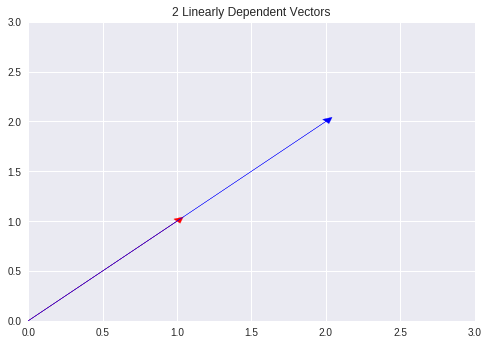

In [29]:
plt.arrow(0,0, v41[0], v41[1], head_width=0.06, head_length=0.06, color='r')
plt.arrow(0,0, v42[0], v42[1], head_width=0.06, head_length=0.06, color='b')
plt.xlim(0,3)
plt.ylim(0,3)
plt.title('2 Linearly Dependent Vectors')
plt.show()

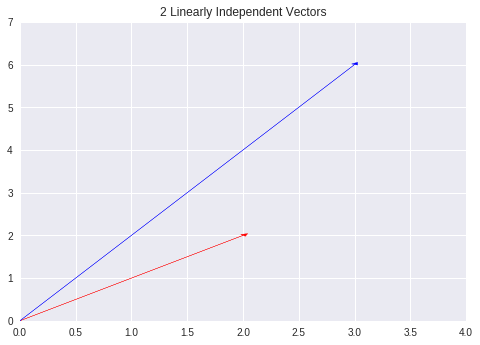

In [31]:
plt.arrow(0,0, v42[0], v42[1], head_width=0.06, head_length=0.06, color='r')
plt.arrow(0,0, v43[0], v43[1], head_width=0.06, head_length=0.06, color='b')
plt.xlim(0,4)
plt.ylim(0,7)
plt.title('2 Linearly Independent Vectors')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

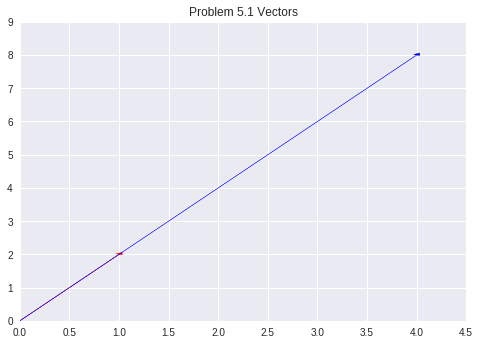

In [33]:
# Define matrices
g = np.array([1,2])
h = np.array([4,8])

# Plot matrices
plt.arrow(0,0, g[0], g[1], head_width=0.07, head_length=0.07, color='r')
plt.arrow(0,0, h[0], h[1], head_width=0.07, head_length=0.07, color='b')
plt.xlim(0,4.5)
plt.ylim(0,9)
plt.title('Problem 5.1 Vectors')
plt.show()


The span of the vector space is all vectors on the lie that they lie on.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

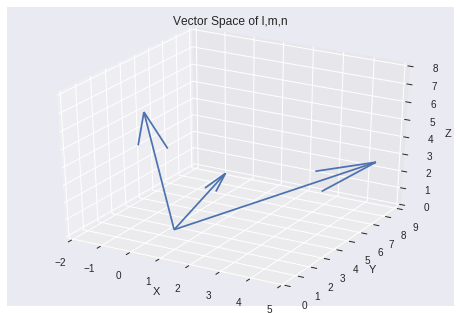

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# Define matrices
# l = np.array([1,2,3])
# m = np.array([-1,0,7])
# n = np.array([4,8,2])

# Plot Matrices
three_d = np.array([[1,1,1,1,2,3],
                  [1,1,1,-1,0,7],
                  [1,1,1,4,8,2]])

X, Y, Z, U, V, W = zip(*three_d)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=.9)
ax.set_xlim([-2, 5])
ax.set_ylim([0, 9])
ax.set_zlim([0, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Vector Space of l,m,n')
plt.show();

The span of the vector space l,m,n is linearly independent and spans the vector space R(3)

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



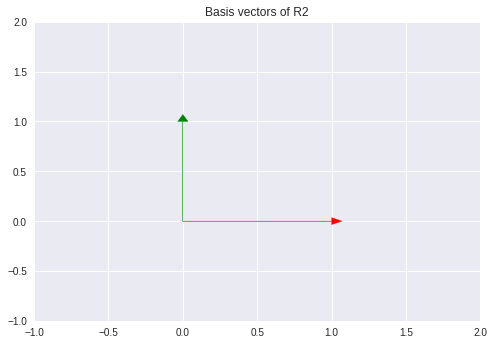

In [60]:
# Unit vectos form a basis for R2 since they are linearly independent and span that space.

ihat = np.array([1,0])
jhat = np.array([0,1])

# Plot matrices
plt.arrow(0,0, ihat[0], ihat[1], head_width=0.07, head_length=0.07, color='r')
plt.arrow(0,0, jhat[0], jhat[1], head_width=0.07, head_length=0.07, color='g')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.title('Basis vectors of R2')
plt.show();


## 6.2 What does it mean to form a basis?

To form a basis of a vector space V means a set of vectors that are linearly independent and spans the vector space V.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [59]:
# define matrices
p = np.array([[1,2,3],
             [-1,0,7],
             [4,8,2]])

print('The rank for matrix P is', LA.matrix_rank(p))

The rank for matrix P is 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tell us how much of the real space that it can span. A rank of 3 can span the vector space of R3.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

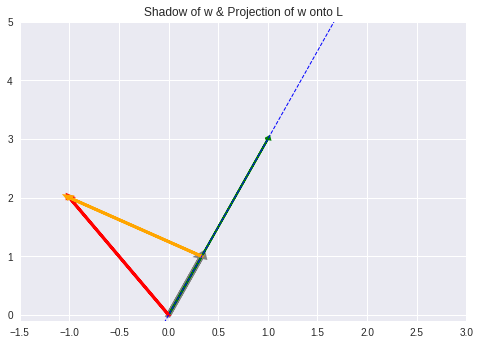

In [88]:
# Define matrices
# v = np.array([1,3])
# w = np.array([-1,2])

# Plot matrices to see projection possibilities
# plt.arrow(0,0, v[0], v[1], head_width=0.07, head_length=0.07, color='r')
# plt.arrow(0,0, w[0], w[1], head_width=0.07, head_length=0.07, color='g')
# plt.xlim(-1.1,2)
# plt.ylim(0,3.1)
# plt.title('2 lines')
# plt.show();

# Axis Bounds
plt.xlim(-1.5,3)          
plt.ylim(-.1,5)

# Original Vector
v = np.array([1,3])
w = np.array([-1,2])
proj = np.multiply(1/3,v)
proj_line = w-proj

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=5, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=2, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], proj_line[0], proj_line[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')

plt.title("Shadow of w & Projection of w onto L")
plt.show()

In [0]:
1dir(np.multiply)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

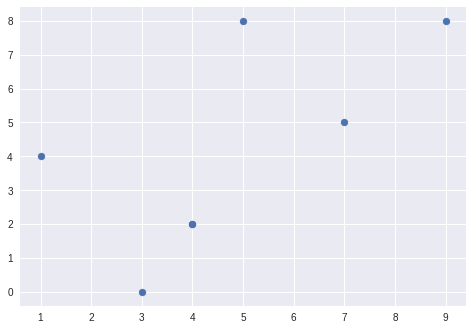

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()